# Lab 4
## Isolated vertex vs connectivity phase transition in _G(n, M)_
## [Erdős-Rényi](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model) giant component tipping point

#### **Two variants:**
* __G(n, M)__: a graph is chosen uniformly at random from the collection of all graphs which have _n_ nodes and *M* edges. <br>
    In this lab we will generate G(n, M) random graphs by adding M random edges to an empty graph. 
* __G(n, p)__: a graph is constructed by connecting nodes randomly, namely each edge is included in the graph with probability p independent from every other edge.

![random_graph](https://www.researchgate.net/profile/Neville_Curtis2/publication/313854183/figure/fig10/AS:463976178950150@1487631949714/Erdoes-Renyi-model-of-random-graph-evolution_W640.jpg)

### What we covered in the last class:

The goal was to show that the G(n, p) Erdős-Rényi random graph becomes connected around $p= \log(n)/n$

__Claim:__
* If in the G(n, p) model $p<\frac{(1-\varepsilon )\ln n}{n}$, then the graph will almost surely contain isolated vertices, and thus be disconnected.
* If in the G(n, p) model $p>\frac{(1+\varepsilon )\ln n}{n}$, then the graph  will almost surely  be connected. <br>

1. The goal was to evaluate the goodness-of-fit of the curves, to be able to decide which curve fits the data better. 
2. Similarly to the triangle containment analysis, we investigated the number of edges required to make the G(n, M) random graph free of isolated nodes. 
3. Furthermore, we investigated that after the last isolated node disappeared, how many further edges are required to make the graph connected.

__Note:__ In regression analysis $n$ denoted the sample size, in graph theory/network science $n$ denotes the size of the graph, i.e. the number of nodes. 

### **Goal of the following exrices:**

1. The goal is to investigate when the last isolated vertex disappears in G(n, M). We start with an empty graph G, and we keep adding random edges to G until it has no isolated vertices. We repeat this procedure several times and note when the last isolated vertex disappeared. Then we investigate the distribution of the number of edges required to make the graph free of isolated nodes. 
2. We investigate that after the last isolated node disappeared, how many further edges are required to make the graph connected.


__Claim:__
* If in the G(n, p) model $p<\frac{(1-\varepsilon )\ln n}{n}$, then the graph will almost surely contain isolated vertices, and thus be disconnected.
* If in the G(n, p) model $p>\frac{(1+\varepsilon )\ln n}{n}$, then the graph  will almost surely  be connected. <br>


It means that in the G(n, M) graph the isolated vertices disappear around $\binom{n}{2}\frac{\ln(n)}{n} = \frac{n(n-1)}{2}\frac{\ln(n)}{n} = \frac{(n-1)\ln(n)}{2}$ edges. What is more, probably the graph will be connected as well. 

# Solution for __Exercise 4__ of Lab 3 

Implement a function called ```no_isolates```, which is very similar to the ```first_triangle``` function, but it focuses on the isolated nodes instead of the first triangle. 

It should have one input: the size of the graph. The function should start with an empty graph, and then it should add edges until there are no isolated nodes in the graph. When the last isolated node disappeared, the function should return the number of edges of the graph. 

Useful built-in functions:
* [nx.empty_graph(n)](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.empty_graph.html)
* [nx.complete_graph(n)](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.complete_graph.html#networkx.generators.classic.complete_graph)
* [Graph.number_of_edges()](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.number_of_edges.html)
* [nx.isolates(G)](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.isolate.isolates.html) (you have to use ```list(nx.isolates(G))``` to get the list of isolated nodes of G)

In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import Counter
import pandas as pd
from scipy.optimize import curve_fit 

In [2]:
def no_isolates(graph_size=50, theoretical_value=False):
    
    # If theoretical_value == True, then print out (n-1)ln(n)/2
    if theoretical_value:
        print('(n-1)log(n)/2 = ' + str(np.log(graph_size)*(graph_size-1)/2))

    # Create an empty graph
    graph = nx.empty_graph(graph_size)
    
    # possible_edges = edges of complete graph
    possible_edges = set(nx.complete_graph(graph_size).edges)
 
    # While the graph contains isolates:
    while list(nx.isolates(graph)):

        # Add a random edge to the graph
        random_edge = random.choice(list(possible_edges))
        possible_edges -= {random_edge}
        graph.add_edge(*random_edge)
        
    return graph.number_of_edges()

In [3]:
no_isolates()

124

In [4]:
no_isolates(theoretical_value=True)

(n-1)log(n)/2 = 95.84456363298958


108

# Solution for __Exercise 5__ of Lab 3 

Similarly to __Exercise 1__ of Lab 2, investigate the distribution of the number of edges required to make the graph free of isolated nodes, i.e. the distribution of the output of the previous function:
1. Create a list of a few thousand independent trials, e.g. 3-5 thousand (and save it in a variable)
2. Plot the histogram of the trials. Useful function: [plt.hist(x, bins=40)](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html)
3. Plot the frequencies against the required number of edges on a [scatter plot](https://en.wikipedia.org/wiki/Scatter_plot). 
    * On the same figure, plot a red vertical dashed line at $x=(n-1)\ln(n)/2$ with the help of the [plt.axvline](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.axvline.html)

In [5]:
edges_no_isolates = [no_isolates() for _ in range(5000)]

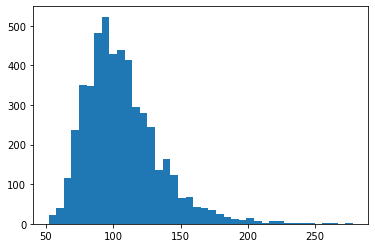

In [6]:
plt.hist(edges_no_isolates, bins=40)
plt.show()

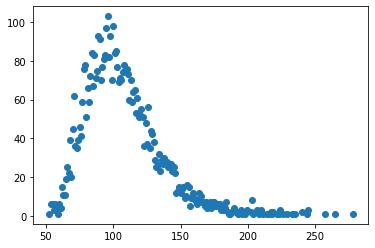

In [7]:
edges_no_isolates_cnt = dict(Counter(edges_no_isolates))
plt.scatter(edges_no_isolates_cnt.keys(), edges_no_isolates_cnt.values())
plt.show()

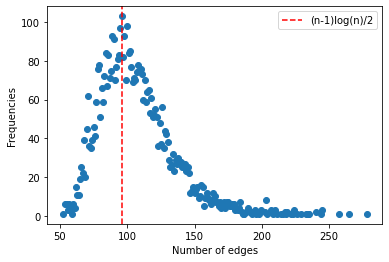

In [8]:
plt.scatter(edges_no_isolates_cnt.keys(), edges_no_isolates_cnt.values())
plt.axvline(x=np.log(50)*(50-1)/2, linestyle='--', c='red', label='(n-1)log(n)/2')
plt.xlabel('Number of edges')
plt.ylabel('Frequencies')
plt.legend()
plt.show()

### <span style="color:red">__Take-home meassage:__</span> __The "theoretical value" $(n-1)\ln(n)/2$ is at the peak__

## __After the last isolated node disappeared, how many additional edges are required to make the graph connected?__

# __Exercise 1__
## (Exercise 7 of Lab 3)

Implement a function which has one input: the number of nodes. The function should perform the following steps:
1. Create an empty graph (use the input for the size of this graph).
2. Add random edges to the graph until it has no isolated nodes.
3. While the graph is not connected, add more random edges one-by-one. (Useful function: [nx.is_connected](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.is_connected.html#networkx.algorithms.components.is_connected))
4. If the graph becomes connected, return the number of additional edeges that you added in step 3.  

### Investigate the distribution of the output of this function!

---

---

---

## Now we are going to investigate the __largest connected component__ of the $G(n, p)$ random graph

__Definition__ (Order of a function)


Let $f$ be a real (or complex) valued function and $g$ a real valued function, both defined on the real positive numbers, such that __g(x) is strictly positive__ for all large enough values of x

$f(x) = O(g(x))$ if and only if there exists a positive real number $M$ and a real number $x_0$ such that

$$|f(x)|\leq M\cdot g(x) \quad\text{ for all }x\geq x_{0}$$

#### __Theorem__: 

* If $n\cdot p =c$, where $c<1$, (i.e. $p < \frac{1}{n}$) then G(n, p) will (asymptotically) almost surely have __no connected components__ of size __larger than $O(\log(n))$__.
* If $n\cdot p = 1$, (i.e. $p = \frac{1}{n}$) then G(n, p) will (asymptotically) almost surely have a __largest component__ whose size is of order __$n^{2/3}$__.
* If $n\cdot p \rightarrow c > 1$, (i.e. $p > \frac{1}{n}$) where c is a constant, then G(n, p) will (asymptotically) almost surely have a __unique giant component__ containing a positive fraction of the vertices. No other component will contain more than O(log(n)) vertices.

#### Meaning of the theorem: 

If we investigate how the size of the largest connected component changes as we increase $p$ in the $G(n, p)$ Erdős-Rényi random graph, we should see that the size of the component immediately increases around $p=\frac{1}{n}$. ($\log n << n^{2/3} << n$) 

### **Goal of these exercises:**

Goal of these exercises is to check the claims of the theorem. Namely, to investigate the (average) size of the largest connected component around $p=1/n$, i.e. when 
1. $p$ is slightly smaller than $1/n$,
2. $p$ equals to $1/n$,
3. $p$ is slightly greater than $1/n$

In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import pydot 
import pandas as pd

# __Exercise 2__ 

In order to be able to investigate the size of the lagerst connected component, we need a function that returns the largest connected component of a graph.

1. Implement a function, which takes a networkx graph as an input, and returns its largest connected component. <br>
__Hint__: Use (and take a look at the examples of) the [nx.connected_components](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.connected_components.html#networkx.algorithms.components.connected_components) and [Graph.subgrpah](https://networkx.github.io/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html) functions. 
2. Test your function on an Erdős-Rényi random graph! 
    1. Generate an Erdős-Rényi graph with ```n=50``` and ```p=1/50``` parameters. Use the [nx.fast_gnp_random_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.random_graphs.fast_gnp_random_graph.html#networkx.generators.random_graphs.fast_gnp_random_graph) function, and save it in a variable.
    2. For a nice drawing of the graph, calculate the positions of the vertices with the [nx.drawing.nx_pydot.graphviz_layout](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pydot.graphviz_layout.html?highlight=drawing%20nx_pydot%20graphviz_layout#networkx.drawing.nx_pydot.graphviz_layout) function, and save it in a variable.
    3. Draw your graph with the usual [nx.draw](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw) function (set its ```pos``` parameter to the previously calculated positions)
        * If pydot is not installed, then open anaconda prompt or the terminal and run the following: `conda install -c anaconda pydot`, or use another [graph layout](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout), e.g.`kamada_kawai`. 
    4. Now let's highlight the largest connected component of the generated graph. You can do it by highlighting the edges of the largest connected component with the [nx.draw_networkx_edges](https://networkx.github.io/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges) function.
    The ```edge_color``` parameter of this function sets the color of the edges, and ```width``` sets the width of the edges. Set its color to red, and its width to 3. 

__This should take you about 15-20 minutes!__
#### __Life hack__: You can check the parameters and the description of any function by hitting ```SHIFT + TAB```.  
       

### Now let's investigate the size of the largest connected component in G(n, p), around p=1/n

## Let $p=  (1+\varepsilon)/n$

### __How to choose $\varepsilon$, to be able to see the phase transitions?__

If $n$ is large and
1. If $\varepsilon <0$, then $p < \frac{1}{n}$ and the size of the largest connected component is $O(\log n)$. 
2. If $\varepsilon = 0$, then  $p = \frac{1}{n}$, and the size of the largest component is $O(n^{2/3})$
3. If $\varepsilon > 0$, but small, then  $p > \frac{1}{n}$ and we have a giant component of size $2\varepsilon n$.

From the second and the third statement, we want choose an $\varepsilon$ such that $n^{2/3} << 2 \varepsilon n$ to be able to see the phase transition.
$$n^{2/3} <<  \varepsilon n$$
$$\frac{n^{2/3}}{n} << \varepsilon$$
$$n^{-1/3} << \varepsilon $$

Furthermore we also want $1-\varepsilon >0$

__Example:__

Let $n=10000$, then $\frac{1}{n} = 0.0001$. We want $\varepsilon >> n^{-1/3} \approx 0.046  $, so we look for $\varepsilon$ in the form $\lambda \cdot n^{-1/3} $. On the other hand we also want $1-\varepsilon> 0$

$$1- \varepsilon = 1 - \lambda \cdot n^{-1/3}   > 0 $$ 
$$\frac{1}{n^{-1/3}} > \lambda $$
$$\lambda < n^{1/3} \approx 21.5$$
So we have two constraints on $\lambda$:
1. $\lambda < n^{1/3} \approx 21.5$
2. $ \varepsilon >> n^{-1/3} \Longrightarrow \lambda n^{-1/3} >> n^{-1/3} \Longrightarrow \lambda >> 1$
So in this example $\lambda = 10$ could be a good choice. <br>
Generally, we can chose something which is between $1$ and $ n^{1/3} $, e.g.:
$$\lambda = \frac{1+n^{1/3} }{2} $$

# __Exercise 3__ 

Create the following variables:
* ```n```: number of nodes. Set it to ```200```
* ```lamb```: the $\lambda$ parameter. Set it to $\frac{1+n^{1/3} }{2} $
* ```epsilon```: the $\varepsilon$ parameter. Set it to $\lambda \cdot n^{-1/3} $

Now you are going to create a figure, that consists of 4 subfigures. All the four figures will show G(n, p) graphs but with different p parameters. Similarly to __Exercise 1__ we will highlight the connected components of the graphs.
* In the top left: ```p = (1-epsilon) / n``` ,
* Top right: ```p = 1 / n```,
* Bottom left: ```p = (1+epsilon) / n```
* Bottom right: ```p = log(n) / n``` (this is where the graph is expected to become connected)

Complete the code bellow! The instructions are in the comments.

__This should take you about 15 minutes!__

In [7]:
# Define the variables

## n number of nodes:
n = 
## lambda:
lamb = 
## epsilon:
epsilon = 

# p value at which giant component of size log(n) nodes is expected
p_logn = (1-epsilon)/n

#  p value at which giant component of size n^{2/3} nodes is expected
p_n23 = 1/n

#  p value at which giant component of size O(n) nodes is expected
p_n = (1+epsilon)/n

# p value at which graph is expected to become completely connected
p_conn = np.log(n) / n

# p parameters in list
pvals=[p_logn, p_n23, p_n, p_conn]

# p parameters as keys, and expected size of the largest component in values. 
# We will use it for the subtitles of the figures
size_of_largest_comp = {p_logn:'log(n)', p_n23:r'$n^{2/3}$', p_n:r'$\varepsilon n$', p_conn:'n'}

In [ ]:
region = 220  # for pylab 2x2 subplot layout
# The 22 means 2x2 grid. The region of the top left figure is coded by 221, the top right 222, 
# bottom left 223, and bottom right 224.

plt.figure(figsize=(9,9)) # here we can set the size of the figure
plt.subplots_adjust(left=0, right=1, bottom=0, top=0.95, wspace=0.02, hspace=0.01) # Tune the subplot layout.

for p in pvals:
    # Generate a G = G(n, p) Erdős-Rényi random graph:
 
    
    # Calculate the graphviz or kamada_kawai layout of the G graph and save it in a variable:
  
    
    # Position of the figure:
    region += 1
    plt.subplot(region) # From now we draw everything in the subplot encoded by 'region' = (221, 222, 223, 224) 
    
    # Title of the subplot
    plt.title(f"p = {round(p, 3)}. Size of the largest component: {size_of_largest_comp[p]}")
    
    # Draw the graph with the calclated layout, set the size of the nodes to 15. (node_size parameter)
    
    
    # Identify connected components:
    # Create a list, which contains the connected components and save it in a 'connected_components' variable
    # Hint: use the G.subgraph and the nx.connected_components(G) functions

    
    # Get the largest connected component from the connected_components list, 
    # and save it in a variable called largest_connected_component

    
    # Highlight the largest connected component:
    # Set the colors of the edges to red, and the width of the edges to 4


    # Show other connected components, but with more transparent color.
    # For each component in connected_components, draw the component's edges,
    # Set the color to red, the width to 4, and the transparency to 0.3 
    # (the alpha parameter sets the transparency). 

    
    
plt.show()

## __Exercise 4__ 

Let ```n = 200```. Investigate the distribution of the size of the largest connected component. Create __three__ separate scatterplots with different values of p: ```(1-epsilon)/n```, ```1/n```, and ```(1+epsilon)/n```

1. For a given ```p```: create a list of length ```1000``` , which consists of the (random) number of nodes of the largest connected component of the G(n, p) graph. (Save this list in a variable)
2. Print out the expected order of size of the largest connected component together with the average size of the generated graphs (i.e. the average of the previous list). Do these two numbers have the same order of magnitude?
3. Create a scatter plot which illustrates the distribution of the list, i.e. you should use the ```Counter``` function again, and plot the frequencies against the sizes. <br> Add two vertical lines to the scatterplot (```plt.axvline```):
    1. Plot the first vertical line at the mean of the sizes, and its label should be "mean" (```label='mean'```).
    2. Plot the second vertical line at the theoretical order of size of the largest connected component. Its color should be red and its style should be dashed (`linestyle='--'` or `ls='--'`). Set its label to the theoretical order. 
    
    To show the labels, write ```plt.legend()``` before ```plt.show()```

__This should take you about 15 minutes!__

In [9]:
n = 200

In [10]:
lamb = (1+n**(1/3))/2

In [11]:
epsilon = lamb * n**(-1/3)

In [12]:
p_logn = (1-epsilon)/n
p_n23 = 1/n
p_n = (1+epsilon)/n

# __Exerecise 5__

We have seen that for a fixed $n$ number of nodes, the observed size of the largest connected component has the same order as the expected value. Now let's consider a broader range of graph sizes.

For a gien $p$, we are going to calculate the average size of the largest connected component for many values of $n$ (graph sizes). To this end we will use the ```calc_pvals``` function, which calculates the three interesting values of $p$ (```(1-epsilon)/n```, ```1/n```, and ```(1+epsilon)/n```)

In [19]:
def calc_pvals(n):
    lamb = (1+n**(1/3))/2
    epsilon = lamb * n**(-1/3)
    
    return (1-epsilon)/n, 1/n, (1+epsilon)/n

Implement a function, called `mean_size_lcc`, which has two inputs: ```graph_sizes``` and ```sample_size```.

The output of the function should be a list which contains three sublists corresponding to the three different values of $p$. Each of these sublists contain the average sizes of the largest connected compononent of the $G(n, p)$ random graphs for $n \in graph\_sizes$. Since we are interested in the average size, for each $n$ (graph size) and for each $p$, we have to generate `sample_size` number of graphs, get their largest connected component, and save the size of the largest connected component. For example the first element of a sublist corresponds to average size of the largest component of  ```G(n=graph_sizes[0], p)```, and the length of the sublists is equal to the length of the `graph_sizes` list.

The function should so something like this:
* ```data = []```
* For ```p in ```$\{\frac{1-\varepsilon}{n}, \frac{1}{n}, \frac{1+\varepsilon}{n}\}$: (where $n$ changes dynamically)
    * For ```n in graph_sizes```:
        1. Create a list of length ```sample_size```, which consists of the sizes of the largest connected component of the G(```n, p```) graphs
        2. Calculate the mean of this list, and append it to the ```data```.



In other words ```data[i][j]``` is the average size of the largest connected component of ```G(n=graph_sizes[j], p=calc_pvals(graph_sizes[j])[i] )```, ($i=1,2,3$ and $j \in graph\_sizes$)

# __Exercise 6__ 

In [26]:
from scipy.optimize import curve_fit 

Now lets consider the following graph sizes: $n = 30,31,\ldots, 199, 200$

In [20]:
graph_sizes = range(30,201)

In [23]:
data = mean_size_lcc(graph_sizes, 30)

Visualize the three statements of the __Theorem__:
1. Fit logarithmic function (use ```test_log``` and ```curve_fit``` function) to the first sublist of the ```data```, i.e. when $p < \frac{1}{n}$, hence the size of the largest component is of order $\log n$. 
    1. Create a scatterplot which shows the average size of the largest connected component (y axis) against the number of nodes (x axis). 
    2. In the same figure plot the fitted logarithmic curve. Set its linestyle to dashed and its color to red.  
2. Similarly, fit a power function (use ```test_pow```) to the second sublist of the ```data```, i.e. when $p = \frac{1}{n}$, hence the size of the largest component is of order $n^{2/3}$. Compare the fitted power parameter to 2/3. Are they close to each other?
    1. Create a scatterplot which shows the average size of the largest connected component (y axis) against the number of nodes (x axis). 
    2. In the same figure plot the fitted power curve. Set its linestyle to dashed and its color to red.  
3. Fit a line (use ```test_lin```) to the third sublist of the  ```data```, i.e. when $p > \frac{1}{n}$, hence the size of the largest component is of order $n$.
    1. Create a scatterplot which shows the average size of the largest connected component (y axis) against the number of nodes (x axis). 
    2. In the same figure plot the fitted line. Set its linestyle to dashed and its color to red.  

__This should take you about 20 minutes!__

In [24]:
def test_log(x, a, b):
    return a*np.log(x) + b

In [34]:
def test_power(x, b, c):
    return (x**b) + c

In [40]:
def test_lin(x, a, b):
    return a*x + b